### Results for marginal distributions for Australian dataset 

- 36 cities

### Gamma model

In [ ]:
## retrieve variables from gnn
model_version = 1
target_distribution = "gamma_hurdle"
base_nn = "HLSTM" #(Keep this fixed)

cities=sorted(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
             'NorahHead', 'NorfolkIsland',  'Richmond',
            'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
            'Wollongong', 'Canberra', 'Tuggeranong',  'Ballarat',
            'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
            'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
            'Perth',  'Walpole', 'Hobart', 
            'AliceSprings', 'Darwin', 'Uluru'])
 #had to remove 'Albany' , 'Katherine','Launceston','MountGinini','Newcastle','Penrith','SalmonGums',
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )

gamma_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    city_data.keys()
    day_idx = 2
    pred_mu = city_data['pred_mu'][:,day_idx] #.shape
    pred_p = city_data['pred_p'][:,day_idx] 
    pred_disp = city_data['pred_disp'][:, day_idx]
    target_rain_value = city_data['target_rain_value'][:,day_idx]
    dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]
    gamma_allcities.append([i,location,pred_mu,pred_disp,pred_p,target_rain_value,dates])
    
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates



In [43]:
### Gamma ROC

from sklearn.metrics import roc_curve, auc
from scipy.special import gamma
from math import exp
import numpy as np
import scipy.stats as scs

# Gamma: alpha = 1/disp, beta = alpha/mu


g_0mm=[]
g_0mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            g_0mm.append(1)
        else:
            g_0mm.append(0)
        #vetor of 'probability it rained this much'
        g_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(0.1))))

print('0 done')

g_5mm=[]
g_5mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            g_5mm.append(1)
        else:
            g_5mm.append(0)
        #vetor of 'probability it rained this much'
        g_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(5))))
print('5 done')


g_10mm=[]
g_10mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            g_10mm.append(1)
        else:
            g_10mm.append(0)
        #vetor of 'probability it rained this much'
        g_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(10))))
print('10 done')


g_15mm=[]
g_15mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            g_15mm.append(1)
        else:
            g_15mm.append(0)
        #vetor of 'probability it rained this much'
        g_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(15))))
print('15 done')


g_20mm=[]
g_20mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            g_20mm.append(1)
        else:
            g_20mm.append(0)
        #vetor of 'probability it rained this much'
        g_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(20))))
print('20 done')


g_25mm=[]
g_25mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            g_25mm.append(1)
        else:
            g_25mm.append(0)
        #vetor of 'probability it rained this much'
        g_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(25))))
print('25 done')

from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



0 done
5 done
10 done
15 done
20 done
25 done


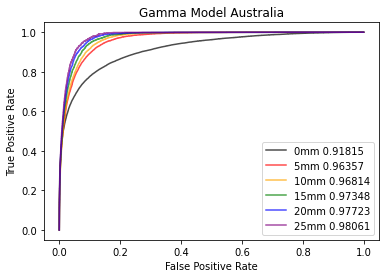

In [44]:
### GAMMA

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(g_0mm,g_0mm_cdfx)
auc0 = metrics.roc_auc_score(g_0mm,g_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(g_5mm,g_5mm_cdfx)
auc5 = metrics.roc_auc_score(g_5mm,g_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(g_10mm,g_10mm_cdfx)
auc10 = metrics.roc_auc_score(g_10mm,g_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(g_15mm,g_15mm_cdfx)
auc15 = metrics.roc_auc_score(g_15mm,g_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(g_20mm,g_20mm_cdfx)
auc20 = metrics.roc_auc_score(g_20mm,g_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(g_25mm,g_25mm_cdfx)
auc25 = metrics.roc_auc_score(g_25mm,g_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Gamma Model Australia')
plt.savefig('ROC Gamma model')

### Log-Normal model

In [46]:
###load lognormal
model_version = 4
target_distribution = "lognormal_hurdle"
base_nn = "HLSTM" #(Keep this fixed)
cities=sorted(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
             'NorahHead', 'NorfolkIsland',  'Richmond',
            'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
            'Wollongong', 'Canberra', 'Tuggeranong',  'Ballarat',
            'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
            'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
            'Perth',  'Walpole', 'Hobart', 
            'AliceSprings', 'Darwin', 'Uluru'])
 #had to remove 'Albany' , 'Katherine','Launceston','MountGinini','Newcastle','Penrith','SalmonGums',
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )
lognormal_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    print(i,location)
    city_data.keys()
    day_idx = 2
    pred_mu = city_data['pred_mu'][:,day_idx] #.shape
    pred_p = city_data['pred_p'][:,day_idx] 
    pred_disp = city_data['pred_disp'][:, day_idx]
    target_rain_value = city_data['target_rain_value'][:,day_idx]
    dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]
    lognormal_allcities.append([i,location,pred_mu,pred_disp,pred_p,target_rain_value])

c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0 Adelaide
1 Albury
2 AliceSprings
3 BadgerysCreek
4 Ballarat
5 Brisbane
6 Cairns
7 Canberra
8 Cobar
9 CoffsHarbour
10 Dartmoor
11 Darwin
12 GoldCoast
13 Hobart
14 Moree
15 MountGambier
16 Nhil
17 NorahHead
18 NorfolkIsland
19 Nuriootpa
20 PearceRAAF
21 Perth
22 PerthAirport
23 Portland
24 Richmond
25 Sydney
26 SydneyAirport
27 Townsville
28 Tuggeranong
29 Uluru
30 WaggaWagga
31 Walpole
32 Watsonia
33 Williamtown
34 Witchcliffe
35 Wollongong
36 Woomera


In [61]:
### Log-Normal ROC

from sklearn.metrics import roc_curve, auc
from math import exp
import numpy as np
import scipy.stats as scs

# Lognormal: mu=mu, disp=sigma

log_0mm=[]
log_0mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            cp_0mm.append(1)
        else:
            cp_0mm.append(0)
        #vetor of 'probability it rained this much'
        log_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(0.1))))
print('0 done')
 
log_5mm=[]
log_5mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            log_5mm.append(1)
        else:
            log_5mm.append(0)
        #vetor of 'probability it rained this much'
        log_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(5))))
print('5 done')

log_10mm=[]
log_10mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            log_10mm.append(1)
        else:
            log_10mm.append(0)
        #vetor of 'probability it rained this much'
        log_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(10))))
print('10 done')


log_15mm=[]
log_15mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            log_15mm.append(1)
        else:
            log_15mm.append(0)
        #vetor of 'probability it rained this much'
        log_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(15))))
print('15 done')


log_20mm=[]
log_20mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            log_20mm.append(1)
        else:
            log_20mm.append(0)
        #vetor of 'probability it rained this much'
        log_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(20))))
print('20 done')


log_25mm=[]
log_25mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            log_25mm.append(1)
        else:
            log_25mm.append(0)
        #vetor of 'probability it rained this much'
        log_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).cdf(25))))
print('25 done')

0 done
5 done
10 done
15 done
20 done
25 done


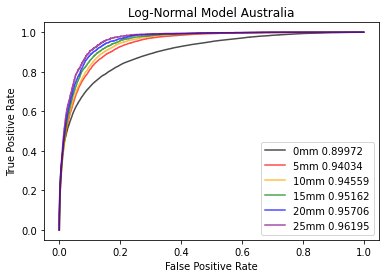

In [62]:
### plot ROC
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### lognormal

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(log_0mm,log_0mm_cdfx)
auc0 = metrics.roc_auc_score(log_0mm,log_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(log_5mm,log_5mm_cdfx)
auc5 = metrics.roc_auc_score(log_5mm,log_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(log_10mm,log_10mm_cdfx)
auc10 = metrics.roc_auc_score(log_10mm,log_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(log_15mm,log_15mm_cdfx)
auc15 = metrics.roc_auc_score(log_15mm,log_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(log_20mm,log_20mm_cdfx)
auc20 = metrics.roc_auc_score(log_20mm,log_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(log_25mm,log_25mm_cdfx)
auc25 = metrics.roc_auc_score(log_25mm,log_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Log-Normal Model Australia')
plt.savefig('ROC Log-Normal model')

### Compound Poisson model

In [65]:
###Load CP model
model_version = 4
target_distribution = "compound_poisson"
base_nn = "HLSTM" #(Keep this fixed)
cities=sorted(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
             'NorahHead', 'NorfolkIsland',  'Richmond',
            'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
            'Wollongong', 'Canberra', 'Tuggeranong',  'Ballarat',
            'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
            'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
            'Perth',  'Walpole', 'Hobart', 
            'AliceSprings', 'Darwin', 'Uluru'])
 #had to remove 'Albany' , 'Katherine','Launceston','MountGinini','Newcastle','Penrith','SalmonGums',
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )
cp_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    print(i,location)
    city_data.keys()
    day_idx = 2
    pred_mu = city_data['pred_mu'][:,day_idx] #.shape
    pred_p = city_data['pred_p'][:,day_idx] 
    pred_disp = city_data['pred_disp'][:, day_idx]
    target_rain_value = city_data['target_rain_value'][:,day_idx]
    dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]
    cp_allcities.append([i,location,pred_mu,pred_disp,pred_p,target_rain_value])

0 Adelaide
1 Albury
2 AliceSprings
3 BadgerysCreek
4 Ballarat
5 Brisbane
6 Cairns
7 Canberra
8 Cobar
9 CoffsHarbour
10 Dartmoor
11 Darwin
12 GoldCoast
13 Hobart
14 Moree
15 MountGambier
16 Nhil
17 NorahHead
18 NorfolkIsland
19 Nuriootpa
20 PearceRAAF
21 Perth
22 PerthAirport
23 Portland
24 Richmond
25 Sydney
26 SydneyAirport
27 Townsville
28 Tuggeranong
29 Uluru
30 WaggaWagga
31 Walpole
32 Watsonia
33 Williamtown
34 Witchcliffe
35 Wollongong
36 Woomera


In [72]:
### CP ROC
#[0:i,1:location,2:['pred_mu'],3:['pred_disp'],4:['pred_p'],5:['target_rain_value']
from sklearn.metrics import roc_curve, auc
from math import exp
import numpy as np
import scipy.stats as scs

# Lognormal: mu=mu, disp=sigma

cp_0mm=[]
cp_0mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            cp_0mm.append(1)
        else:
            cp_0mm.append(0)
        #vetor of 'probability it rained this much'
        cp_0mm_cdfx.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(0.1))
print('0 done')

cp_5mm=[]
cp_5mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            cp_5mm.append(1)
        else:
            cp_5mm.append(0)
        #vetor of 'probability it rained this much'
        cp_5mm_cdfx.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(5))
print('5 done')

cp_10mm=[]
cp_10mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            cp_10mm.append(1)
        else:
            cp_10mm.append(0)
        #vetor of 'probability it rained this much'
        cp_10mm_cdfx.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(10))
print('10 done')


cp_15mm=[]
cp_15mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            cp_15mm.append(1)
        else:
            cp_15mm.append(0)
        #vetor of 'probability it rained this much'
        cp_15mm_cdfx.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(15))
print('15 done')


cp_20mm=[]
cp_20mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            cp_20mm.append(1)
        else:
            cp_20mm.append(0)
        #vetor of 'probability it rained this much'
        cp_20mm_cdfx.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(20))
print('20 done')


cp_25mm=[]
cp_25mm_cdfx=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            cp_25mm.append(1)
        else:
            cp_25mm.append(0)
        #vetor of 'probability it rained this much'
        cp_25mm_cdfx.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).cdf(25))
print('25 done')

0 done
5 done
10 done
15 done
20 done
25 done


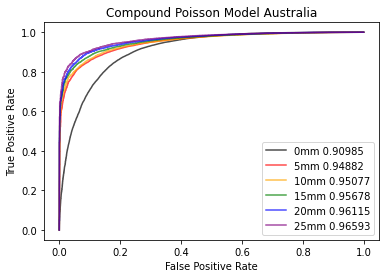

In [81]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### CP

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(cp_0mm,cp_0mm_cdfx)
auc0 = metrics.roc_auc_score(cp_0mm,cp_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(cp_5mm,cp_5mm_cdfx)
auc5 = metrics.roc_auc_score(cp_5mm,cp_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(cp_10mm,cp_10mm_cdfx)
auc10 = metrics.roc_auc_score(cp_10mm,cp_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(cp_15mm,cp_15mm_cdfx)
auc15 = metrics.roc_auc_score(cp_15mm,cp_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(cp_20mm,cp_20mm_cdfx)
auc20 = metrics.roc_auc_score(cp_20mm,cp_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(cp_25mm,cp_25mm_cdfx)
auc25 = metrics.roc_auc_score(cp_25mm,cp_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Compound Poisson Model Australia')
plt.savefig('ROC CP model')


for idx,val in enumerate(cp_0mm):
    cp_0mm[idx]=abs(val-1)
for idx,val in enumerate(cp_5mm):
    cp_5mm[idx]=abs(val-1)
for idx,val in enumerate(cp_10mm):
    cp_10mm[idx]=abs(val-1)
for idx,val in enumerate(cp_15mm):
    cp_15mm[idx]=abs(val-1)
for idx,val in enumerate(cp_20mm):
    cp_20mm[idx]=abs(val-1)
for idx,val in enumerate(cp_25mm):
    cp_25mm[idx]=abs(val-1)

### Overall results

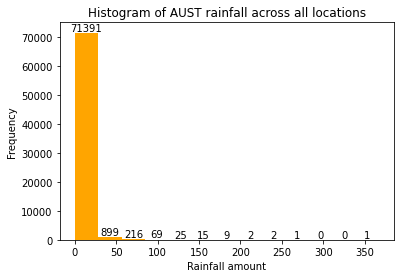

In [42]:
### Hist of rain
import numpy as np
import matplotlib.pyplot as plt

all_rain=np.array([])
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates
for idx,place in enumerate(cities):
    all_rain=np.concatenate((all_rain,gamma_allcities[idx][5]))
counts, edges, bars = plt.hist(all_rain,color='orange',bins=13)

plt.bar_label(bars)
plt.title('Histogram of AUST rainfall across all locations')
plt.xlabel('Rainfall amount')
plt.ylabel('Frequency')
plt.savefig('Hist AUST')

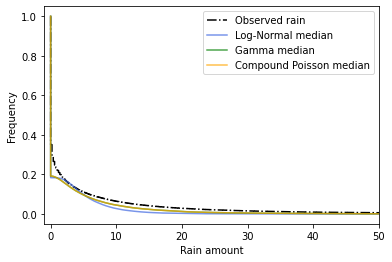

In [89]:
### P(rain<x) - take median as predicted rain, and use that to do ecdf

import scipy.stats as scs
#gamma
g_median_all=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        if place[4][day]>0.5:
            g_median_all.append(scs.gamma(scale=place[3][day]*place[2][day],a=1/place[3][day]).ppf((place[4][day]-0.5)/place[4][day]))
        else:   
            g_median_all.append(0)


#lognormal
log_median_all=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        if place[4][day]>0.5:
            log_median_all.append(scs.lognorm(s=place[3][day],scale=np.exp(place[2][day])).ppf((place[4][day]-0.5)/place[4][day]))
        else:      
            log_median_all.append(0)

#CP
cp_median_all=[]

for place in cp_allcities:
    for day in range(len(place[5])):
        cp_median_all.append(tweedie.tweedie(mu=place[2][day],p=place[4][day],phi=place[3][day]).ppf(0.5))
            



#probability of precipitation > x
from matplotlib import pyplot as plt 

import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

#empirical cdf
allrain=np.array([])
for place in gamma_allcities:
    allrain=np.concatenate((allrain,place[5]))
ecdf=ECDF(allrain)
#alternative with median
log_med_ecdf=ECDF(log_median_all)
g_med_ecdf=ECDF(g_median_all)
cp_med_ecdf=ECDF(cp_median_all)


plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(log_med_ecdf.x,1-log_med_ecdf.y,color='royalblue',alpha=0.7)
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='green',alpha=0.7)
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='orange',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.legend(['Observed rain','Log-Normal median','Gamma median','Compound Poisson median'])
plt.savefig('diagnost_figure_c')

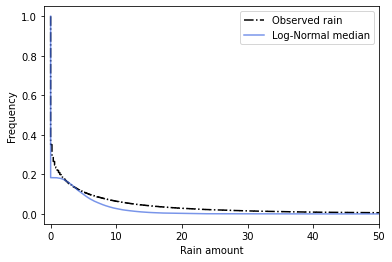

In [90]:
plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(log_med_ecdf.x,1-log_med_ecdf.y,color='royalblue',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.legend(['Observed rain','Log-Normal median'])
plt.savefig('diagnost_figure_c_lognorm')

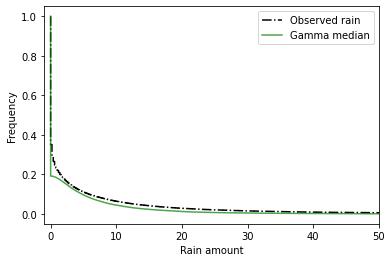

In [91]:
plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='green',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.legend(['Observed rain','Gamma median'])
plt.savefig('diagnost_figure_c_gamma')

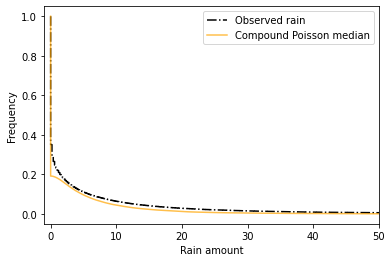

In [92]:
plt.plot(ecdf.x, 1-ecdf.y,'-.',color='black')
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='orange',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.legend(['Observed rain','Compound Poisson median'])
plt.savefig('diagnost_figure_c_cp')